Chapter 2 - Perceptron implementation

In [11]:
import numpy as np 

class Perceptron(object):
    """
    Perceptron classifier
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # greek letter for LEARNING RATE
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ =rgen.normal(loc=0.0, scale=0.01,size=1+X.shape[1]) # generate random numbers in a standard distribution, with std dev of 0.01; IMPORTANT: we cannot initialize weights at 0, bc ETA(learning rate) would only modify the scale, not the direction
        self.errors_ = []
        for _ in range(self.n_iter):
            errors= 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update !=0.0) # if it is different than zero, update the weights
            self.errors_.append(errors)
        return self

    def net_input(self,X):
        #calculate net input
        return np.dot(X, self.w_[1:] +self.w_[0])

    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1, -1) 



In [6]:
import pandas as pd 

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header= None)

df.head()
df.tail

<bound method NDFrame.tail of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

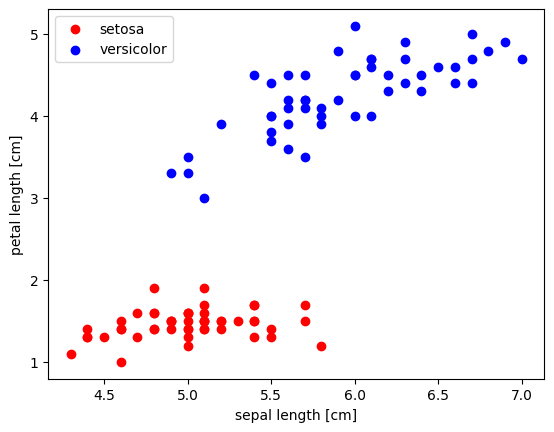

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# get setosa and versicolor
y = df.iloc[0:100, 4] # get first 100 samples, get the numb 4 column== class
y= np.where(y=="Iris-setosa", -1,1)

# extract sepal length and peta length
X= df.iloc[0:100, [0,2]].values

# plot
plt.scatter(X[:50,0], X[:50,1],  # axis 0 and axis 1 
            color= "red", marker="o", label= "setosa")

plt.scatter(X[50:100,0], X[50:100,1],
            color= "blue", marker="o", label= "versicolor")


plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

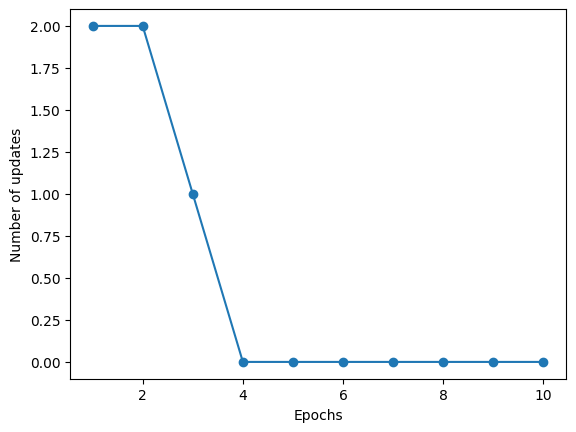

In [13]:
## train

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), 
         ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

Implementation for visualizing a two dimensiaonal datasets

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "+")
    colors= ("red", "blue", "green", "cyan", "gray")
    cmap = ListedColormap(colors[:len(np.unique(y))])


    # plot decision surface
    x1_min, x1_max= X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max= X[:,1].min() -1, X[:,1].max() +1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z, alpha=0.3, cmap= cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class samples

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y== cl, 1],
                    alpha=0.8,
                    marker = markers[idx],
                    label= cl,
                    edgecolor="black")
        
        

C:\Users\User\AppData\Local\Temp\ipykernel_17464\2831926926.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


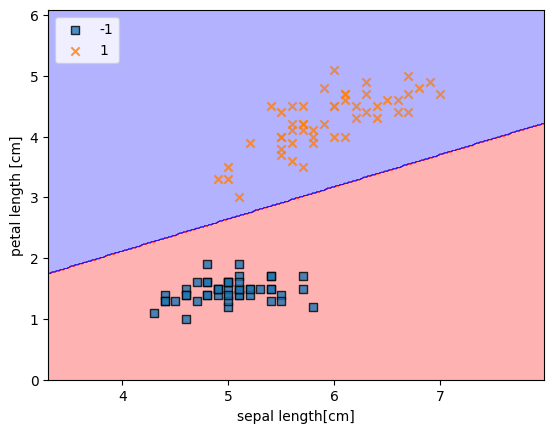

In [15]:
plot_decision_regions(X,y, classifier= ppn)
plt.xlabel("sepal length[cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()